# INFO 7374 Machine Learning in Finance
# Garch Model 

![title](wallstreet.jpg)

## Installing the datareader
### Remote Data Access

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.

In [4]:
#!pip install pandas_datareader

## Importing all the requried libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [13]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 1, 1)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])
# corresponding csv file is saved in an ouput directory 
#df_amzn.to_csv('data/data.csv')
amzn

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
1,2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2,2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
3,2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
4,2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...,...
498,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
499,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
500,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
501,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015


In [14]:
amzn.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
amzn.describe()

,High,Low,Open,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,1732.853877,1696.631273,1716.553260,1715.604274,4.756714e+06,1715.604274
std,171.448828,175.899183,174.135515,173.091233,2.311057e+06,173.091233
min,1190.000000,1170.510010,1172.000000,1189.010010,8.813000e+05,1189.010010
25%,1623.735046,1590.880005,1604.005005,1605.509949,3.096050e+06,1605.509949
50%,1763.500000,1731.500000,1749.599976,1750.079956,4.238800e+06,1750.079956
75%,1847.309998,1818.000000,1836.575012,1836.135010,5.783300e+06,1836.135010
max,2050.500000,2013.000000,2038.109985,2039.510010,1.496380e+07,2039.510010


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

![title](highLowOpenClose.png)

         Current function value: 5.959818
         Iterations: 0
         Function evaluations: 156
         Gradient evaluations: 24


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: OptimizeWarning: Unknown solver options: xtol


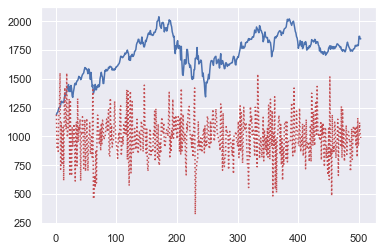

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb  1 20:43:49 2019
GARCH MODEL
@author: Akash M Dubeu
"""
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def GARCH(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 T = Y.shape[0] 
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    

T = amzn.shape[0]
mu = 35;
sig = 5;
#Y = np.random.normal(mu,sig,T);
Y = amzn['Close']
#param0 = np.array([35, 9, 0.2, 0.5])
param0 = np.array([1000, 10000, 0.2, 0.5])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')

In [27]:
T = Y.shape[0]
Y

1      1.269437
2      0.446603
3      1.603332
4      1.432166
5      0.466478
         ...   
498   -0.211603
499    4.350631
500    0.055103
501   -1.232835
502    0.051422
Name: lrets, Length: 502, dtype: float64

In [17]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010,1183.173340,NaN
1,2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951,1199.329997,1.269437
2,2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966,1210.039998,0.446603
3,2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015,1222.760010,1.603332
4,2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995,1243.993327,1.432166


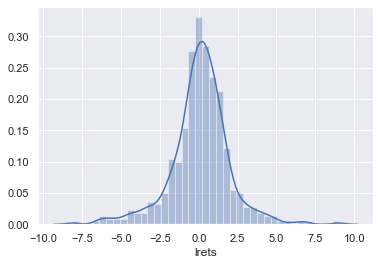

In [18]:
sns.distplot(amzn['lrets'].dropna())

In [19]:

def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T) 
    sigma2 = np.zeros(T)   
    F = np.zeros(T)   
    v = np.zeros(T)   
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])     
        Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood

In [20]:

def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)  
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
    return Y

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xtol
  


         Current function value: 2.678728
         Iterations: 1
         Function evaluations: 132
         Gradient evaluations: 20


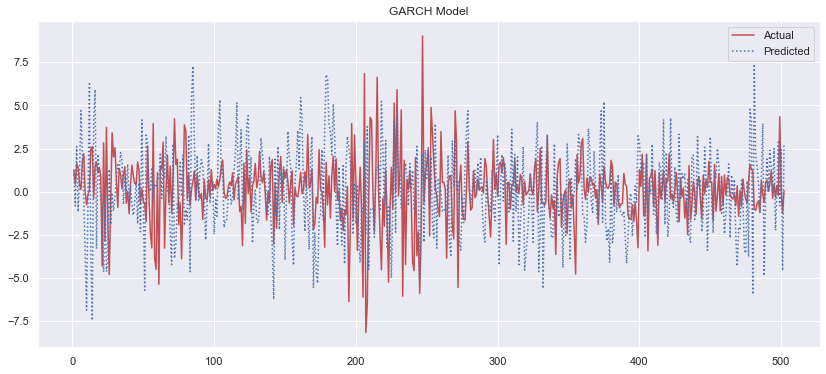

In [21]:
Y = amzn['lrets'].dropna()
T=len(Y)

#Y=np.random.normal(mu,sig,T)
param0=np.array([0.124,1.88,0.2,0.5])
param_star=minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model")
plt.show()

# Citation

1. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
2. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
3. google Images 